# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 17 Local Optmization (II)

## 17.1 Gradient descent on 2D


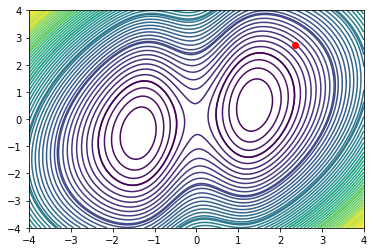

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 # + 3* np.exp(-x[0]**2)

def f2(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()


In [2]:
# variable stepwidth
def derivative2(f, xy, d=0.01):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize2(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
            #print(dd)
        x_next = x_now - df_now*dx
        
        print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)



step:     1.87242796397 1.84183285318
step:     1.84183285318 1.40752198343
step:     1.40752198343 1.36678717604
step:     1.36678717604 1.34323110484
step:     1.34323110484 1.30970171454
step:     1.30970171454 1.31001056685


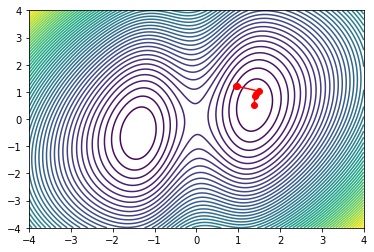

[ 0.94993312  1.2165541 ] 1.87242796397
[ 1.37934082  0.52893063] 1.30970171454


In [3]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize2(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))


## 17.2 Conjungate Gradient
As you have seen in the gradient descent method the algorihtm makes steps in same direction several times. 
$$ d_0 = \gamma \nabla f(x_0)$$

Here’s an idea: let’s pick a set of orthoginal search directions so that if we take exactly one step of right length in each of those directions we will reach the minimum. In order to rectify this, we require that our directions be conjugate to one another.

$$ d_1 = \nabla f(x_1) + \beta_0d_0$$


## 17.3 Minimization Packages in Scipy


In [4]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 45
         Function evaluations: 88


In [5]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 8
         Function evaluations: 68
         Gradient evaluations: 17


In [6]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 6
         Function evaluations: 32
         Gradient evaluations: 8


In [7]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 3
         Function evaluations: 102


## 17.4 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$